In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import libraries
import numpy as np
from pandas import read_csv
from matplotlib import pyplot as plt
from statsmodels.tsa.api import Holt
from sklearn.metrics import mean_squared_error 
from math import sqrt 

In [3]:
# import dataset, split into train and test
series = read_csv('datasets/seriesdat.csv')
train = series.iloc[0:10]
test = series.iloc[10:]

In [4]:
# using Holt's linear model predict for test set
y_hat = test.copy()
fit = Holt(np.asanyarray(train['y'])).fit(smoothing_level=0.4, smoothing_slope=0.7, optimized=False)
y_hat['Holt_linear'] = fit.forecast(len(test))
y_hat

,t,y,Holt_linear
10,11,56,51.986649
11,12,75,60.201958
12,13,60,68.417266
13,14,75,76.632575
14,15,88,84.847884


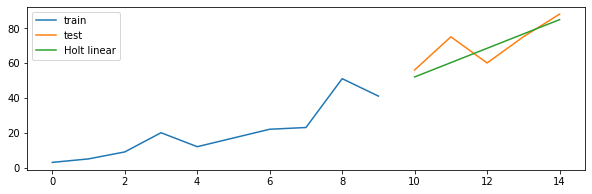

In [5]:
# plot the forecast
plt.figure(figsize=(10,3))
plt.plot(train['y'], label='train')
plt.plot(test['y'], label='test')
plt.plot(y_hat['Holt_linear'], label='Holt linear')
plt.legend(loc='best')
plt.show()

In [9]:
# compute the error
rmse=sqrt(mean_squared_error(test.y, y_hat['Holt_linear']))
print(rmse)

7.981736109419356


In [ ]:
# same as above, now using the ExponentialSmoothing library
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['y']), trend='add', seasonal=None)
fit1 = model.fit(smoothing_level=0.4, smoothing_slope=0.7, optimized=False)
y_hat['DES'] = fit1.forecast(len(test))
y_hat

In [ ]:
plt.figure(figsize=(10,3))
plt.plot(train['y'], label='train')
plt.plot(test['y'], label='test')
plt.plot(y_hat['Holt_linear'], label='Holt linear')
plt.plot(y_hat['DES'], label='DES')
plt.legend(loc='best')
plt.show()

In [ ]:
rmse=sqrt(mean_squared_error(test.y, y_hat['DES']))
print(rmse)

In [ ]:
# damped trend (optional)
fit = Holt(np.asanyarray(train['y']), damped=True).fit(smoothing_level=0.4, smoothing_slope=0.7, damping_slope=0.5)
y_hat['Holt_linear_damped'] = fit.forecast(len(test))
y_hat
plt.figure(figsize=(10,3))
plt.plot(train['y'], label='train')
plt.plot(test['y'], label='test')
plt.plot(y_hat['Holt_linear'], label='Holt linear')
plt.plot(y_hat['Holt_linear_damped'], label='Holt linear damped')
plt.legend(loc='best')
plt.show()

C:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-1-4df722d776b4>:17: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit = Holt(np.asanyarray(train['y'])).fit(smoothing_level=0.4, smoothing_slope=0.7, optimized=False)


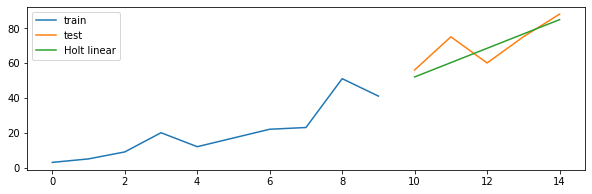

7.981736109419356


C:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-1-4df722d776b4>:36: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = model.fit(smoothing_level=0.4, smoothing_slope=0.7, optimized=False)


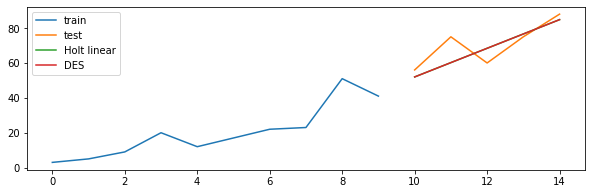

7.981736109419356


<ipython-input-1-4df722d776b4>:53: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit = Holt(np.asanyarray(train['y']), damped=True).fit(smoothing_level=0.4, smoothing_slope=0.7, damping_slope=0.5)
C:\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-1-4df722d776b4>:53: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit = Holt(np.asanyarray(train['y']), damped=True).fit(smoothing_level=0.4, smoothing_slope=0.7, damping_slope=0.5)
C:\Anaconda3\lib\site-packages\pandas\util\_decorators.py:199: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)


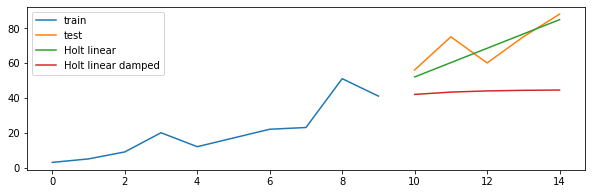

29.30442860257288


In [1]:
rmse=sqrt(mean_squared_error(test.y, y_hat['Holt_linear_damped']))
print(rmse)